In [1]:
import numpy as np
import pandas as pd

import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("/Users/joseluismanzanaresfernandez/Desktop/HACKABOSS/PROYECTO1/salarios_detail_por_jugador.csv")
df

,temporada,liga,nombre_jugador,equipo,prestamo,es_titular,firma_contrato,vencimiento_contrato,posicion,edad,pais_jugador,bruto_anual,neto_anual,bono_bruto,bono_neto,total_bruto,total_neto,clausula_rescision,pais
0,2023,Serie A,Éderson,Atalanta,False,True,2022-07-06,2026-06-30,Centrocampista,24,Brazil,2560000.0,2000000.0,NaN,NaN,7680000.0,6000000.0,NaN,Italy
1,2023,La Liga,Pepelu,Valencia,False,True,2023-07-08,2028-06-30,Centrocampista,25,Spain,1300000.0,620000.0,NaN,NaN,6500000.0,3100000.0,1.000000e+08,Spain
2,2023,La Liga,Pep Chavarría,Rayo Vallecano,False,False,2022-08-31,2027-06-30,Defensa,25,Spain,350000.0,170000.0,NaN,NaN,1400000.0,680000.0,NaN,Spain
3,2023,La Liga,Pejiño,Las Palmas,False,False,2023-06-22,2026-06-30,Delantero,27,Spain,720000.0,350000.0,NaN,NaN,2160000.0,1050000.0,NaN,Spain
4,2023,La Liga,Pedri,Barcelona,False,False,2021-10-14,2026-06-30,Centrocampista,20,Spain,9380000.0,4500000.0,NaN,NaN,28140000.0,13500000.0,1.000000e+09,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8614,2021,Premier League,Jack Stephens,Southampton,NaN,NaN,NaN,NaN,Defensa,28,England,2691421.0,1483732.0,NaN,NaN,NaN,NaN,NaN,England
8615,2021,Premier League,Jack Harrison,Leeds,NaN,NaN,NaN,NaN,Delantero,25,England,2990467.0,1644757.0,NaN,NaN,NaN,NaN,NaN,England
8616,2021,Premier League,Jack Grealish,Manchester City,NaN,NaN,NaN,NaN,Delantero,26,England,17942805.0,9868543.0,NaN,NaN,NaN,NaN,NaN,England
8617,2021,Premier League,Jack Cork,Burnley,NaN,NaN,NaN,NaN,Centrocampista,32,England,2277356.0,1253696.0,NaN,NaN,NaN,NaN,NaN,England


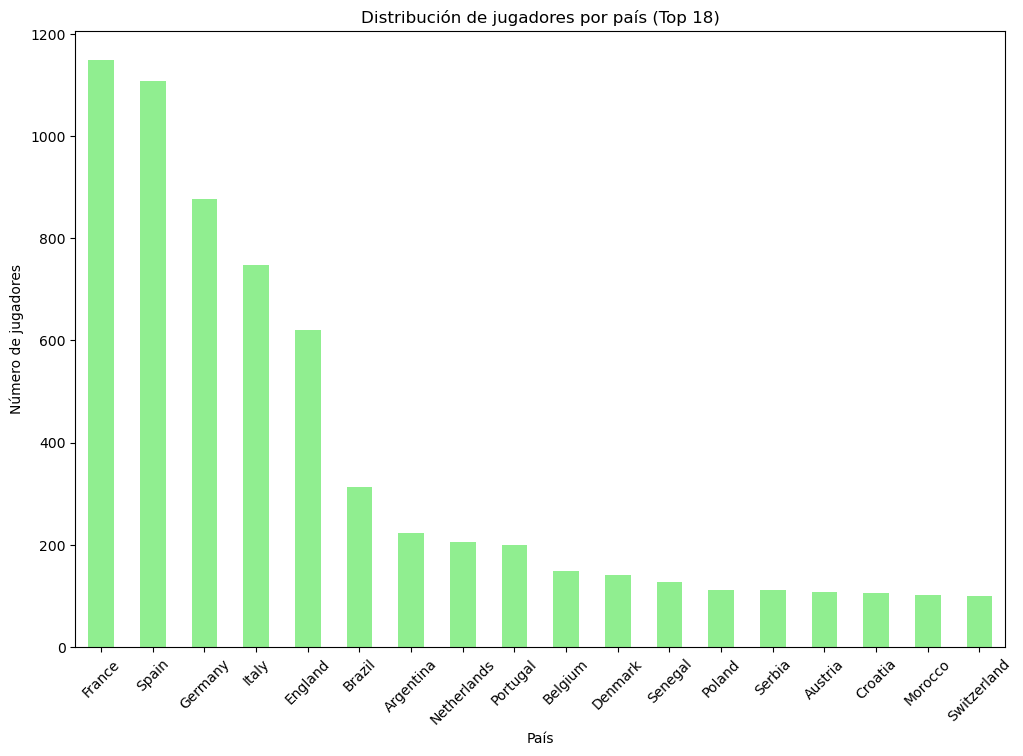

In [45]:
# Contamos el número de jugadores por país
jugadores_por_pais = df['pais_jugador'].value_counts().head(18)

# Creamos el histograma
plt.figure(figsize=(12, 8))
jugadores_por_pais.plot(kind='bar', color='lightgreen')
plt.title('Distribución de jugadores por país (Top 18)')
plt.xlabel('País')
plt.ylabel('Número de jugadores')
plt.xticks(rotation=45)
plt.show()

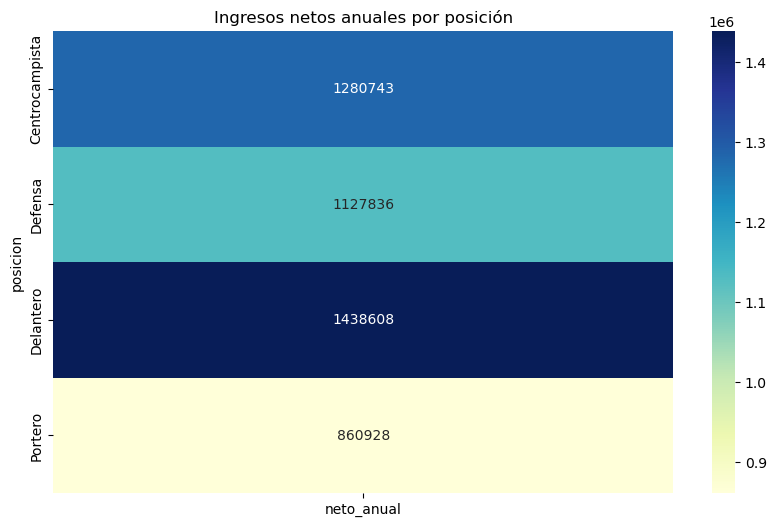

In [28]:
# Crea un pivot table para preparar los datos para el mapa de calor
heatmap_data = df.pivot_table(index='posicion', values='neto_anual', aggfunc='mean')

# Crea el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(data=heatmap_data, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Ingresos netos anuales por posición')
plt.show()

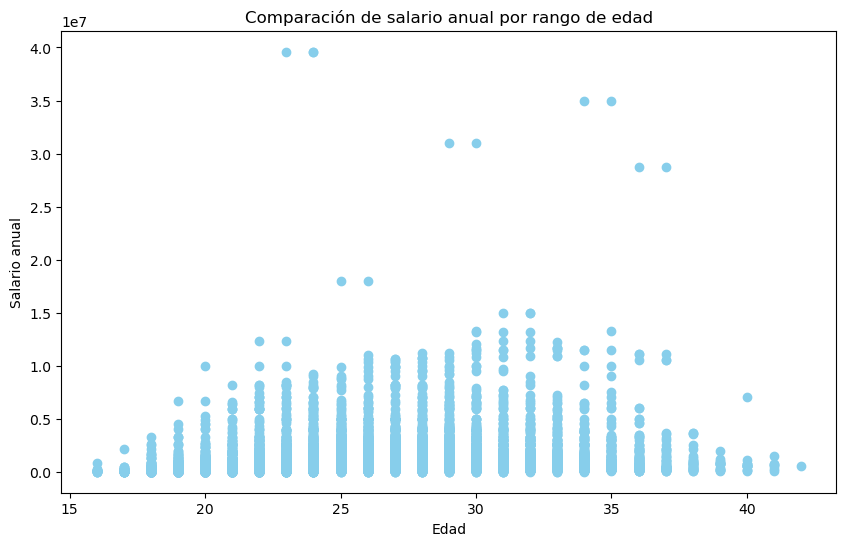

In [33]:
# Crea el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['edad'], df['neto_anual'], color='skyblue')
plt.title('Comparación de salario anual por rango de edad')
plt.xlabel('Edad')
plt.ylabel('Salario anual')
plt.show()

In [31]:
df2 = pd.read_csv("/Users/joseluismanzanaresfernandez/Desktop/HACKABOSS/PROYECTO1/salario_anual_por_jugador.csv")
df2

,pais,liga,equipo,nombre_jugador,salario_anual,posicion,edad,apariciones
0,Spain,La Liga,Barcelona,Frenkie de Jong,37500000,Medio Campo,26,33
1,Spain,La Liga,Barcelona,Sergio Busquets i Burgos,37000000,Medio Campo,35,30
2,Spain,La Liga,Real Madrid,Eden Hazard,31250000,Delantero,32,6
3,Spain,La Liga,Barcelona,Gerard Piqué Bernabéu,29500000,Defensa,36,6
4,Spain,La Liga,Real Madrid,Karim Benzema,24000000,Delantero,35,24
...,...,...,...,...,...,...,...,...
245,France,Ligue 1,Rennes,Martin Albert Frédéric Terrier,3360000,Delantero,26,16
246,France,Ligue 1,Nice,Teremas Igoboras Moffi,3300000,Delantero,24,34
247,France,Ligue 1,Nice,Kasper Schmeichel,3240000,Portero,36,36
248,France,Ligue 1,Monaco,Gelson Dany Batalha Martins,3240000,Delantero,28,10


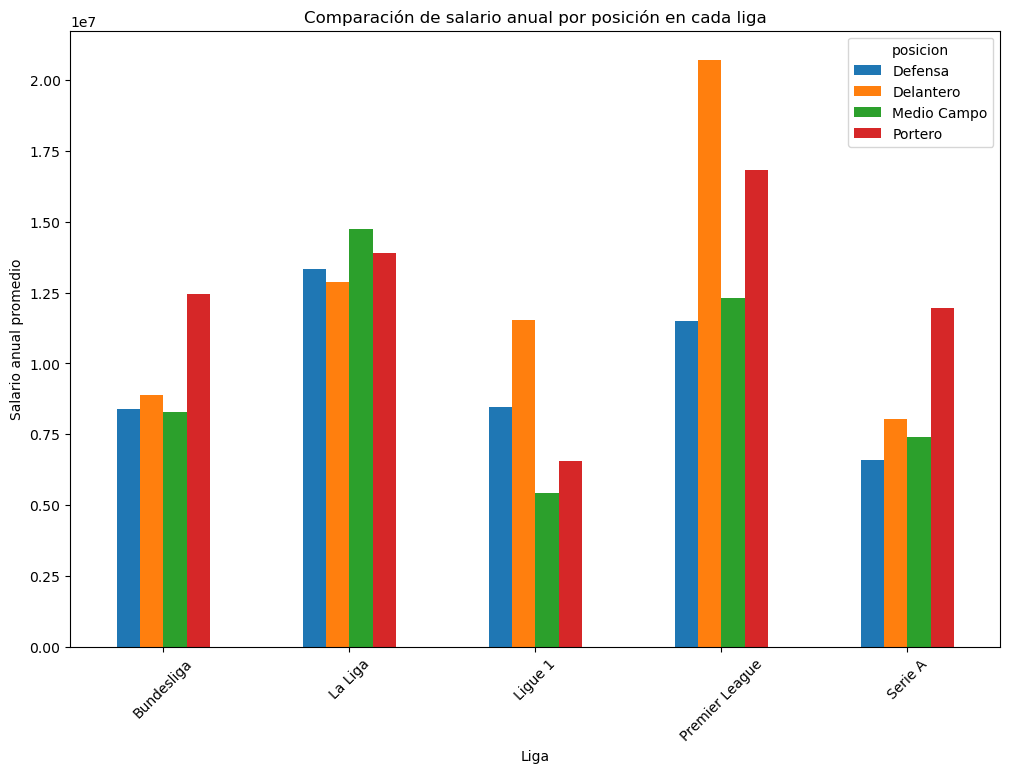

In [32]:
# Agrupamos los datos por liga y posición y calculamos el salario promedio
salario_promedio = df2.groupby(['liga', 'posicion'])['salario_anual'].mean().unstack()

# Creamos el gráfico de barras
salario_promedio.plot(kind='bar', figsize=(12, 8))
plt.title('Comparación de salario anual por posición en cada liga')
plt.xlabel('Liga')
plt.ylabel('Salario anual promedio')
plt.xticks(rotation=45)
plt.show()

In [34]:
df3 = pd.read_csv("/Users/joseluismanzanaresfernandez/Desktop/HACKABOSS/PROYECTO1/datos_por_equipo_1.csv")
df3

,equipo,goles_a_favor,tiros_pp,tarjetas_amarillas,tarjetas_rojas,pc_posesion,pc_pases,aereos_a_favor,rating,liga,temporada
0,Bayern Munich,97,19.8,36,2,0.648,0.860,12.5,6.98,Bundesliga,2021
1,Bayer Leverkusen,80,13.5,64,2,0.537,0.818,13.1,6.77,Bundesliga,2021
2,Borussia Dortmund,85,13.3,61,1,0.594,0.840,12.5,6.77,Bundesliga,2021
3,RB Leipzig,72,12.9,49,0,0.565,0.831,14.9,6.77,Bundesliga,2021
4,Freiburg,58,13.6,34,0,0.486,0.762,19.9,6.68,Bundesliga,2021
...,...,...,...,...,...,...,...,...,...,...,...
287,Torino,7,9.4,20,0,0.497,0.811,14.5,6.44,Serie A,2023
288,Udinese,6,13.2,18,1,0.461,0.796,16.4,6.44,Serie A,2023
289,Cagliari,9,12.2,16,1,0.414,0.783,13.2,6.34,Serie A,2023
290,Empoli,3,10.9,25,0,0.442,0.786,9.3,6.33,Serie A,2023


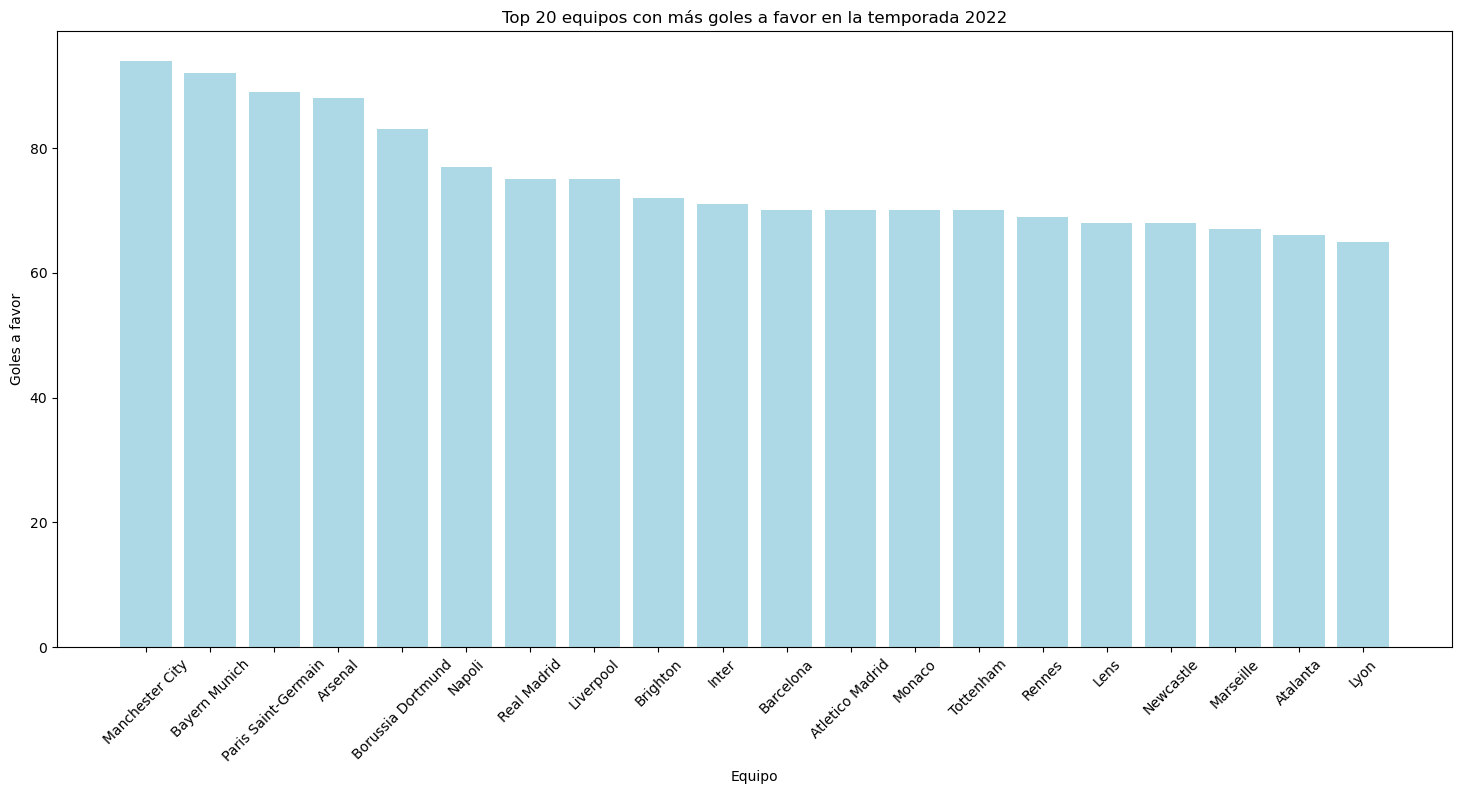

In [38]:
# Filtramos los datos para la temporada 2022 y los 15 equipos con más goles a favor
df_2022 = df3[df3['temporada'] == 2022].nlargest(20, 'goles_a_favor')

# Creamos el gráfico de barras
plt.figure(figsize=(18, 8))
plt.bar(df_2022['equipo'], df_2022['goles_a_favor'], color='lightblue')
plt.title('Top 20 equipos con más goles a favor en la temporada 2022')
plt.xlabel('Equipo')
plt.ylabel('Goles a favor')
plt.xticks(rotation=45)
plt.show()

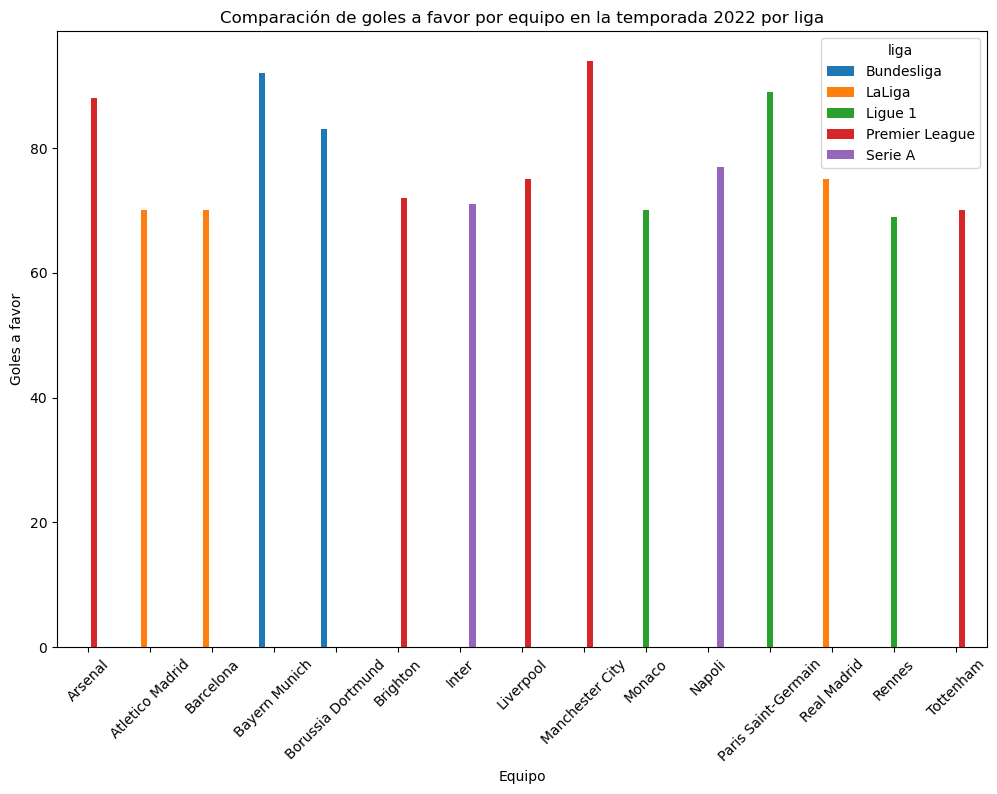

In [40]:
# Filtramos los datos para la temporada 2022 y los 15 equipos con más goles a favor por liga
df_2022 = df3[df3['temporada'] == 2022].nlargest(15, 'goles_a_favor')

# Creamos el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
df_2022.pivot_table(index='equipo', columns='liga', values='goles_a_favor', aggfunc='sum').plot(kind='bar', ax=plt.gca())
plt.title('Comparación de goles a favor por equipo en la temporada 2022 por liga')
plt.xlabel('Equipo')
plt.ylabel('Goles a favor')
plt.xticks(rotation=45)
plt.show()

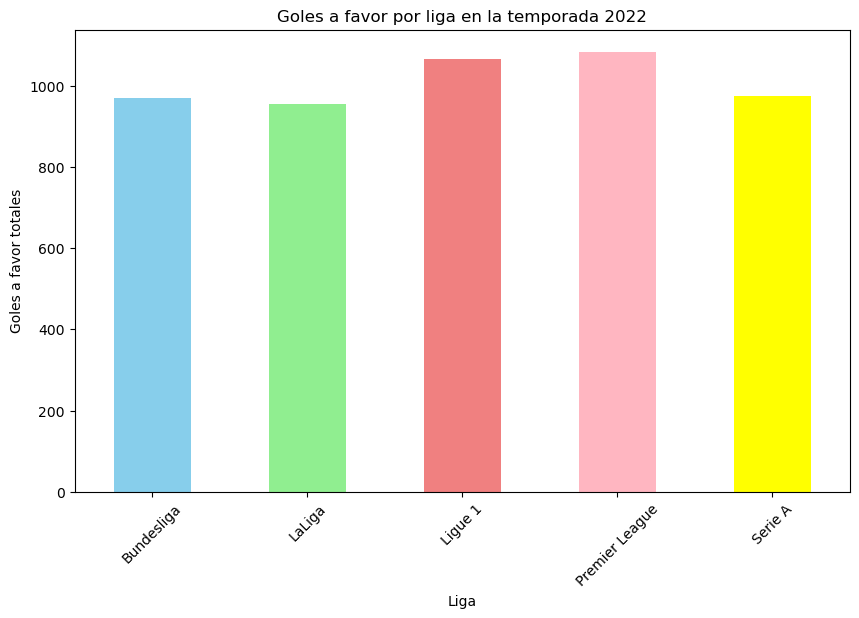

In [43]:
# Filtramos los datos para la temporada 2022
df_2022 = df3[df3['temporada'] == 2022]

# Agrupamos los datos por liga y sumamos los goles a favor
df_agrupado = df_2022.groupby('liga')['goles_a_favor'].sum()

colores = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'yellow'] 

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
df_agrupado.plot(kind='bar', color=colores)
plt.title('Goles a favor por liga en la temporada 2022')
plt.xlabel('Liga')
plt.ylabel('Goles a favor totales')
plt.xticks(rotation=45)
plt.show()